<a href="https://colab.research.google.com/github/ashesh-12/SAMA_ML/blob/main/SAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Disease Prediction System using Machine Learning
This project aims to build a disease prediction system using a structured symptoms dataset. It uses supervised ML classification to predict the most likely disease based on user symptoms


## 📦 Environment Setup
Importing core libraries for data loading, preprocessing, visualization, and model building.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #advanced or realistic version of matplotlib
import scipy.stats as stats
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 📁 Data Collection
Dataset Source: [Hugging Face - Disease Symptom Extensive Clean](https://huggingface.co/datasets/dhivyeshrk/Disease-Symptom-Extensive-Clean)

- Number of records: ~247,000
- Features: Binary symptom indicators (0/1)
- Target: Disease (multi-class classification)


## 🧪 Load the Dataset

We'll begin by loading the dataset into a pandas DataFrame to inspect its structure. This will help us understand the number of features (symptoms), the target column (disease), and check for missing values or anomalies in the data.


In [ ]:
df = pd.read_csv(r'D:\MISSION X\SAMA_ML\Datasets\symptom.csv')

## 🧪 Inspect Dataset

We have loaded `symptom.csv` into a pandas DataFrame. This dataset contains multiple symptom columns and one target column (`disease` or similar) representing the diagnosis.


In [ ]:
# Display the shape and first few rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [ ]:
df.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,0.024876,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,0.155747,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [ ]:
list(df.columns)

['diseases',
 'anxiety and nervousness',
 'depression',
 'shortness of breath',
 'depressive or psychotic symptoms',
 'sharp chest pain',
 'dizziness',
 'insomnia',
 'abnormal involuntary movements',
 'chest tightness',
 'palpitations',
 'irregular heartbeat',
 'breathing fast',
 'hoarse voice',
 'sore throat',
 'difficulty speaking',
 'cough',
 'nasal congestion',
 'throat swelling',
 'diminished hearing',
 'lump in throat',
 'throat feels tight',
 'difficulty in swallowing',
 'skin swelling',
 'retention of urine',
 'groin mass',
 'leg pain',
 'hip pain',
 'suprapubic pain',
 'blood in stool',
 'lack of growth',
 'emotional symptoms',
 'elbow weakness',
 'back weakness',
 'pus in sputum',
 'symptoms of the scrotum and testes',
 'swelling of scrotum',
 'pain in testicles',
 'flatulence',
 'pus draining from ear',
 'jaundice',
 'mass in scrotum',
 'white discharge from eye',
 'irritable infant',
 'abusing alcohol',
 'fainting',
 'hostile behavior',
 'drug abuse',
 'sharp abdominal pain

## 🔍 Initial Observations

- The dataset contains `X` rows and `Y` columns.
- The `diseases` column is the target variable.
- All other columns are binary-encoded symptoms (`1` = present, `0` = absent).
- Next, we’ll check for:
  - Null/missing values
  - Duplicate entries
  - Unique disease classes


## Data Cleaning and Preprocessing

- Checking for missing values in all columns. Missing data can affect model accuracy, so it must be handled carefully.
- Checking for duplicate records, which can bias model training.
- Symptoms columns should be binary (0/1); data type validation will be next.


In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 Series([], dtype: int64)


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 57298


### Handling Duplicates and Data Types

- Removing duplicate rows to avoid bias in model training.
- Checking data types to ensure symptom columns are numerical (binary 0/1).
- Any non-numeric columns in symptoms will be converted appropriately in next steps.

In [ ]:
# Remove duplicates
df_cleaned = df.drop_duplicates().reset_index(drop=True)
print(f"Shape before removing duplicates: {df.shape}")
print(f"Shape after removing duplicates: {df_cleaned.shape}")

Shape before removing duplicates: (246945, 378)
Shape after removing duplicates: (189647, 378)


In [ ]:
# Check data types
print(df_cleaned.dtypes)

diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object


In [ ]:
# Check for duplicates again
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Data Exploration: Disease Distribution and Symptom Validation

- We will examine the number of unique disease classes to understand the classification task’s complexity.
- Analyze how balanced or imbalanced the disease samples are.
- Verify all symptom columns contain only 0/1 values (binary indicators).


In [ ]:
# Check unique diseases and their counts
disease_counts = df_cleaned['diseases'].value_counts()
print(f"Number of unique diseases: {disease_counts.shape[0]}")
print("Top 10 diseases by sample count:")
print(disease_counts.head(10))

Number of unique diseases: 773
Top 10 diseases by sample count:
diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
peripheral nerve disorder         1215
hypoglycemia                      1215
esophagitis                       1215
vaginal cyst                      1215
conjunctivitis due to allergy     1215
Name: count, dtype: int64


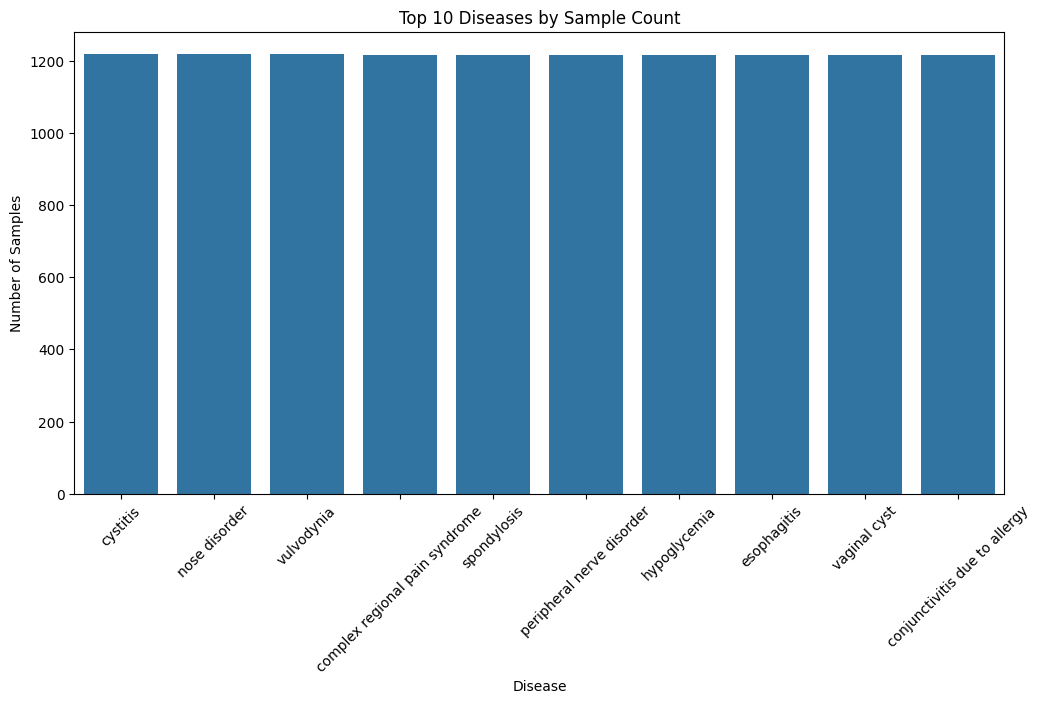

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=disease_counts.index[:10], y=disease_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Diseases by Sample Count")
plt.xlabel("Disease")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# Validate symptom columns are binary (0 or 1)
symptom_columns = df_cleaned.columns.drop('diseases')  # assuming 'disease' is the target col
symptom_unique_vals = df_cleaned[symptom_columns].apply(pd.Series.unique)

# Check if any symptom columns have values other than 0 or 1
non_binary_columns = [col for col in symptom_columns if not set(symptom_unique_vals[col]).issubset({0,1})]

if non_binary_columns:
    print("Columns with non-binary values found:", non_binary_columns)
else:
    print("All symptom columns are binary (0/1).")

All symptom columns are binary (0/1).


## Correlation Analysis of Symptom Features

- Compute the correlation matrix to identify pairs or groups of symptoms that are strongly correlated.
- Highly correlated symptoms might indicate redundancy.
- Understanding these relationships helps us decide on feature reduction strategies.
- Visualization using a heatmap provides intuitive insights into symptom interdependencies.


In [ ]:
# Symptom columns only
symptom_columns = df_cleaned.columns.drop('diseases')
symptom_data = df_cleaned[symptom_columns]

# Calculate correlation matrix
corr_matrix = symptom_data.corr()

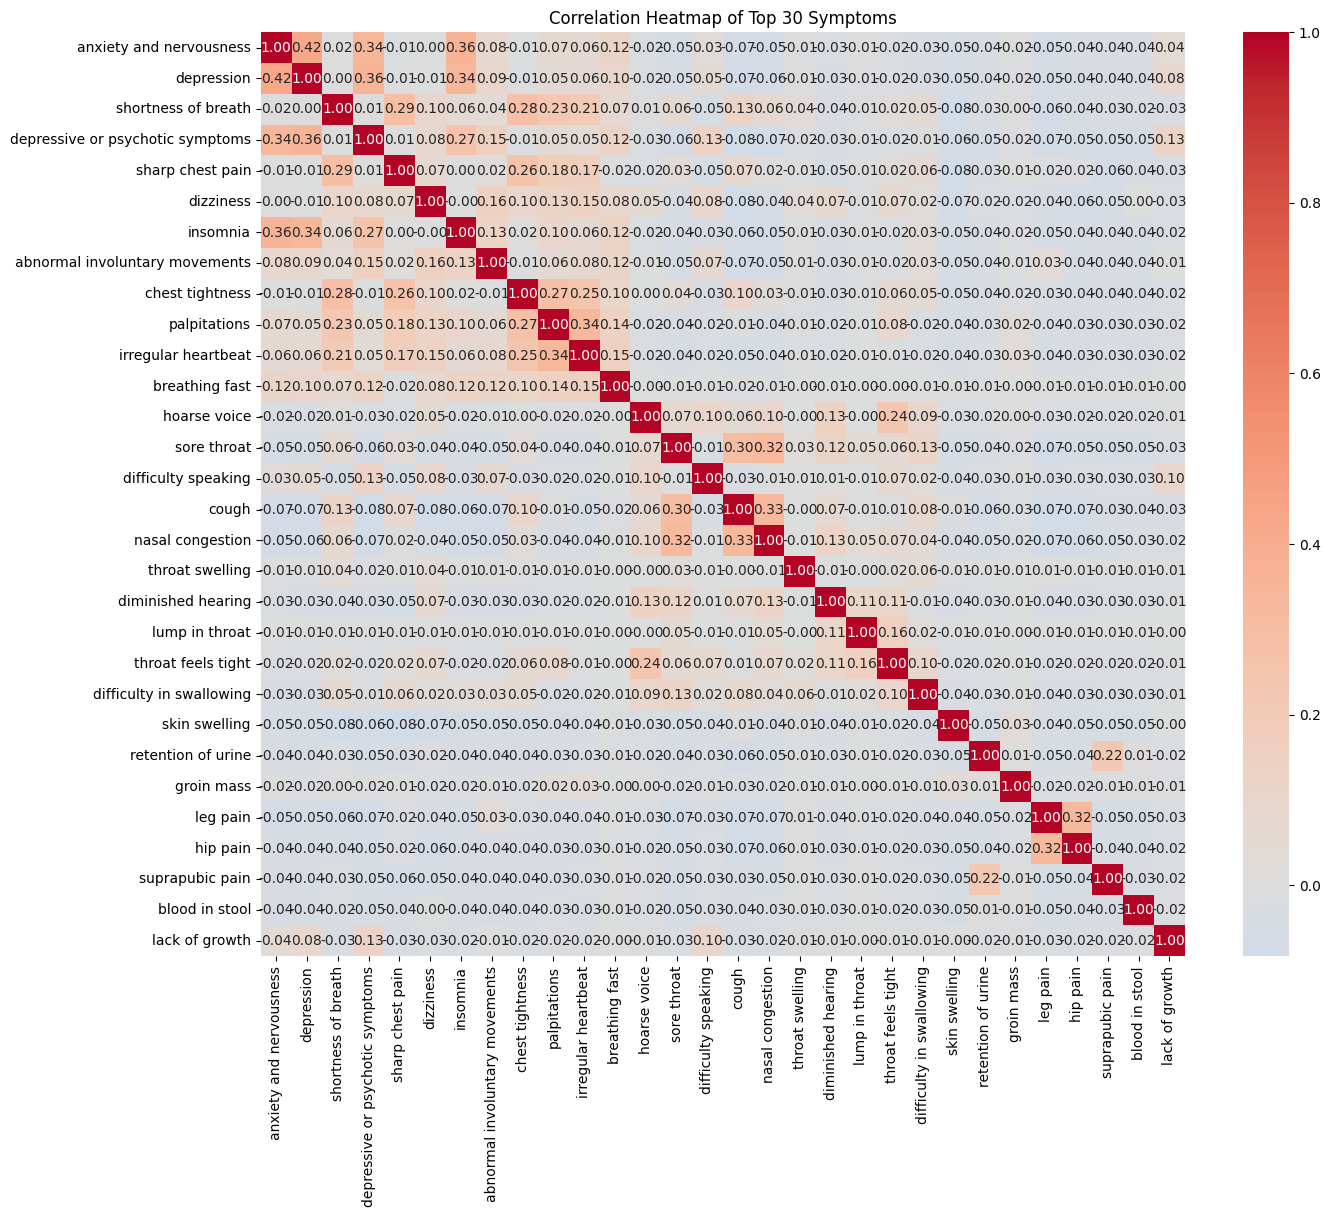

In [ ]:
# Display heatmap for top 30 symptoms (to keep it readable)
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix.iloc[:30, :30], annot=True, cmap='coolwarm', fmt=".2f",center=0, square=True)
plt.title("Correlation Heatmap of Top 30 Symptoms")
plt.show()

In [ ]:
# Find highly correlated symptom pairs
threshold = 0.8
high_corr_var = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                 for i in range(len(corr_matrix.columns))
                 for j in range(i+1, len(corr_matrix.columns))
                 if abs(corr_matrix.iloc[i, j]) > threshold]

print(f"Number of highly correlated symptom pairs (>|{threshold}|): {len(high_corr_var)}")
print("Sample highly correlated symptom pairs:")
for pair in high_corr_var[:10]:
    print(pair)

Number of highly correlated symptom pairs (>|0.8|): 0
Sample highly correlated symptom pairs:


💡 Interpretation
Each symptom seems to carry unique information — this is good for prediction, but it also means that dimensionality reduction via correlation won’t help here.

We'll need to rely on other techniques for feature reduction, like:
Low variance filtering
Feature importance ranking (e.g., Random Forest or mutual information)
PCA (as a last resort for linear compression)

In [ ]:
# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("symptom_cleaned.csv", index=False)
print("Cleaned dataset saved as 'symptom_cleaned.csv'")

Cleaned dataset saved as 'symptom_cleaned.csv'


In [ ]:
df_cleaned = pd.read_csv(r'D:\MISSION X\SAMA_ML\Datasets\symptom_cleaned.csv')

### Saving Cleaned Dataset

- After removing duplicate rows and verifying data integrity, we save the cleaned dataset for further steps.
- The file is saved as `symptom_cleaned.csv` to preserve the original and maintain reproducibility.


## Feature Engineering & Feature Reduction (Part 1): Removing Low Variance Features

- In high-dimensional datasets, some features rarely vary across samples — these are low-variance features.
- Such features add noise and computational cost without improving model performance.
- We remove features with very low variance (e.g., >99% values are 0).


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Exclude target column
X = df_cleaned.drop(columns=["diseases"])
y = df_cleaned["diseases"]

In [ ]:
# Initialize VarianceThreshold (e.g., remove features with <1% variance)
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

In [ ]:
# Get the remaining features
selected_columns = X.columns[selector.get_support()]
df_reduced = pd.DataFrame(X_reduced, columns=selected_columns)
df_reduced["diseases"] = y  # Add back the target

In [ ]:
print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after removing low variance: {df_reduced.shape[1] - 1}")

Original number of features: 377
Number of features after removing low variance: 150


In [ ]:
# Save the reduced dataset to a new CSV file
df_reduced.to_csv("symptom_reduced.csv", index=False)
print("Reduced dataset saved as 'symptom_reduced.csv'")

Reduced dataset saved as 'symptom_reduced.csv'


In [ ]:
df_reduced = pd.read_csv(r'D:\MISSION X\SAMA_ML\Datasets\symptom_reduced.csv')

# Feature Engineering & Feature Reduction (Part 2): Feature Importance using Random Forest

- After removing low variance features, we use a tree-based model to rank the remaining symptom features by importance.
- Random Forest is ideal for this because it can measure non-linear relationships and handles categorical targets well.
- We'll visualize and retain the top N most important features for the model.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Sample a smaller dataset
df_sampled = df_reduced.sample(n=10000, random_state=42)

In [ ]:
# Save the sampled dataset
df_sampled.to_csv(r'D:\MISSION X\SAMA_ML\Datasets\symptom_sampled.csv', index=False)
print("Sampled dataset saved successfully.")

Sampled dataset saved successfully.


In [ ]:
df_sampled = pd.read_csv(r'D:\MISSION X\SAMA_ML\Datasets\symptom_sampled.csv')

In [ ]:
X_sample = df_sampled.drop(columns=["diseases"])
y_sample = df_sampled["diseases"]

In [ ]:
# Train on the smaller subset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_sample.values, y_sample.values)

RandomForestClassifier(random_state=42)

In [ ]:
# Define the path
model_path = r"D:\MISSION X\SAMA_ML\Models\random_forest_feature_importance_model.pkl"

In [ ]:
# Make sure the directory exists (optional but recommended)
os.makedirs(os.path.dirname(model_path), exist_ok=True)

In [ ]:
# Save the model
joblib.dump(rf, model_path)

['D:\\MISSION X\\SAMA_ML\\Models\\random_forest_feature_importance_model.pkl']

In [ ]:
# Load the model
rf_loaded = joblib.load(model_path)

In [ ]:
# Get importances
importances = rf_loaded.feature_importances_
indices = np.argsort(importances)[::-1]

C:\Users\User\AppData\Local\Temp\ipykernel_38008\4289917676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


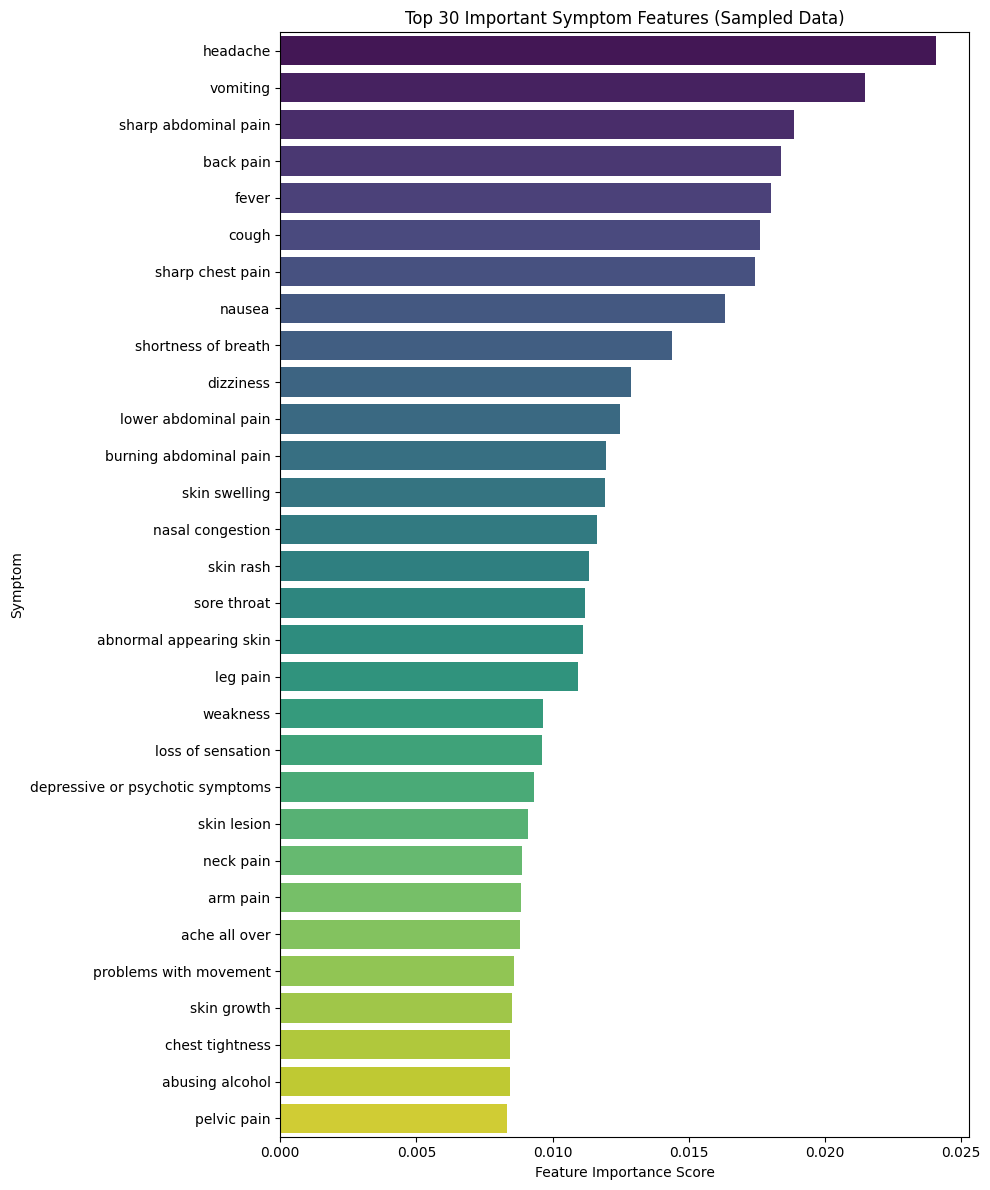

In [ ]:
# Plot
plt.figure(figsize=(10, 12))
sns.barplot(
    y=X_sample.columns[indices][:30],
    x=importances[indices][:30],
    palette="viridis"
)
plt.title("Top 30 Important Symptom Features (Sampled Data)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()

## 🧠 Model Training – Random Forest Classifier with Top 30 Features

In this step, we train a **Random Forest Classifier** using the top 30 most important symptom features identified during feature engineering. This allows us to evaluate how well the model performs with a reduced but highly relevant subset of the dataset.

### 🔍 Objectives
- Train the model on a sampled dataset of 10,000 rows with top 30 important features.
- Evaluate the model’s predictive performance.
- Prepare for comparison with models trained on larger feature sets (e.g., top 50).

### 📦 Dataset
- Source: `df_sampled` (sampled from the cleaned and reduced dataset)
- Shape used: **(10,000, 31)** → 30 features + 1 target (`disease`)

### 🧪 Steps Performed
1. Selected top 30 features based on Random Forest feature importance.
2. Split dataset into training and testing sets (80/20 stratified).
3. Trained a `RandomForestClassifier` with `n_estimators=100`.
4. Evaluated accuracy and classification metrics on the test set.

### 📈 Next Step
- Repeat training with top 50 features.
- Compare accuracy and metrics between models (top 30 vs top 50).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Extract top 30 important features
top_30_features = X_sample.columns[indices][:30]
X_top30 = X_sample[top_30_features]
y = y_sample

In [ ]:
# Count samples per class
class_counts = y.value_counts()

# Keep classes with at least 2 samples
valid_classes = class_counts[class_counts >= 2].index

In [ ]:
# Filter X and y
X_top30_filtered = X_top30[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]

In [ ]:
# Now do stratified split on filtered data
X_train, X_test, y_train, y_test = train_test_split(X_top30_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (Top 30 Features): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy (Top 30 Features): 0.2576

Classification Report:
                                                  precision    recall  f1-score   support

                               abdominal hernia       0.00      0.00      0.00         2
                                abscess of nose       0.00      0.00      0.00         1
                         abscess of the pharynx       0.00      0.00      0.00         1
                                           acne       0.33      0.20      0.25         5
                              actinic keratosis       0.00      0.00      0.00         9
                            acute bronchiolitis       0.15      0.17      0.16        12
                               acute bronchitis       0.47      0.50      0.48        14
                             acute bronchospasm       0.60      0.38      0.46         8
                                 acute glaucoma       0.00      0.00      0.00         2
                            acute k

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Define save path
save_dir = r"D:\MISSION X\SAMA_ML\Models"
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, "random_forest_top30.pkl")

In [ ]:
# Save the model
joblib.dump(rf_model, model_path)
print(f"Model saved at: {model_path}")

Model saved at: D:\MISSION X\SAMA_ML\Models\random_forest_top30.pkl


In [ ]:
# Load the model
rf_model_loaded = joblib.load(model_path)

In [ ]:
# Predict
y_pred = rf_model_loaded.predict(X_test)

In [ ]:
real = y.values

In [ ]:
for i in range(0, len(real)):
    if y_pred[i]==real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(y_pred[i], real[i]))

Pred: personality disorder
Actual: personality disorder

Pred: injury to the leg
Actual: injury to the leg

Pred: drug reaction
Actual: drug reaction

Pred: cholecystitis
Actual: cholecystitis

Pred: gout
Actual: gout

Pred: psoriasis
Actual: psoriasis

Pred: osteoarthritis
Actual: osteoarthritis

Pred: gout
Actual: gout

Pred: gastrointestinal hemorrhage
Actual: gastrointestinal hemorrhage

Pred: skin disorder
Actual: skin disorder



IndexError: index 1980 is out of bounds for axis 0 with size 1980

🧠 Random Forest Model Training on Reduced Dataset
Objective:
Train a Random Forest classifier on the reduced symptom dataset (df_reduced) to evaluate disease prediction performance using all retained features after variance and correlation-based reduction.

Workflow Covered:

✅ Data Preprocessing

✅ Feature Engineering & Reduction

✅ Sampling for Memory Efficiency (if needed)

✅ Model Training

✅ Evaluation using Accuracy & Classification Report

Dataset Summary:

Shape: X.shape = (189647, 150) (approx after reduction)

Target column: "disease"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/SAMA/symptom_reduced.csv'
df_reduced = pd.read_csv(file_path)

In [6]:
print("Shape:", df_reduced.shape)

Shape: (189647, 151)


In [7]:
df_reduced.head()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,symptoms of bladder,itching of skin,hurts to breath,"skin dryness, peeling, scaliness, or roughness",skin irritation,warts,skin rash,low self-esteem,leg weakness,diseases
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,panic disorder
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,panic disorder
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,panic disorder
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,panic disorder
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,panic disorder


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Filter out classes that occur only once
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
df_filtered = df_reduced[df_reduced["diseases"].isin(valid_classes)]

In [12]:
# Redefine X and y after filtering
X = df_filtered.drop(columns=["diseases"])
y = df_filtered["diseases"]

In [13]:
# Now split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Train the Random Forest model
rf_model_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_all.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict
y_pred = rf_model_all.predict(X_test)

In [17]:
# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7010


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Classification Report:
                                                           precision    recall  f1-score   support

                               abdominal aortic aneurysm       1.00      0.88      0.93         8
                                        abdominal hernia       0.84      0.79      0.82        53
                                         abscess of nose       0.27      0.53      0.36        30
                                     abscess of the lung       0.50      1.00      0.67         1
                                  abscess of the pharynx       0.64      0.48      0.55        33
                                    acanthosis nigricans       1.00      0.50      0.67         2
                                               acariasis       0.00      0.00      0.00         2
                                               achalasia       0.14      0.20      0.17         5
                                                    acne       0.17      0.13      0.15     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Save the model in Colab
joblib.dump(rf_model_all, "rf_model_reduced.pkl")

['rf_model_reduced.pkl']

In [21]:
y_real = y.values

In [26]:
for i in range(0, len(y_test)):
    # Compare the predicted value with the actual value from the test set
    if y_pred[i] == y_test.iloc[i]: # Use .iloc for pandas Series indexing
        print('Pred: {0}\nActual: {1}\n'.format(y_pred[i], y_test.iloc[i]))

Streaming output truncated to the last 5000 lines.
Actual: pulmonary embolism

Pred: problem during pregnancy
Actual: problem during pregnancy

Pred: hiatal hernia
Actual: hiatal hernia

Pred: eating disorder
Actual: eating disorder

Pred: epididymitis
Actual: epididymitis

Pred: sickle cell anemia
Actual: sickle cell anemia

Pred: complex regional pain syndrome
Actual: complex regional pain syndrome

Pred: kidney stone
Actual: kidney stone

Pred: injury to the trunk
Actual: injury to the trunk

Pred: contact dermatitis
Actual: contact dermatitis

Pred: chronic sinusitis
Actual: chronic sinusitis

Pred: tendinitis
Actual: tendinitis

Pred: seasonal allergies (hay fever)
Actual: seasonal allergies (hay fever)

Pred: angina
Actual: angina

Pred: nose disorder
Actual: nose disorder

Pred: sickle cell crisis
Actual: sickle cell crisis

Pred: injury to the arm
Actual: injury to the arm

Pred: osteoarthritis
Actual: osteoarthritis

Pred: heart failure
Actual: heart failure

Pred: degenerativ